# Notebook to reproduce Figure 3

## Import

In [2]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functions_IDEAS import compute_ID

## Functions

In [19]:
def normalize_plot(rep0, rep1, diff0, diff1):

    # Flatten and concatenate all values
    all_values_rep = pd.concat([rep0, rep1]).values.flatten()
    all_values_diff = pd.concat([diff0, diff1]).values.flatten()
    all_values = np.concatenate([all_values_rep, all_values_diff])

    # Compute global min and range
    min_val = np.min(all_values)
    max_val = np.max(all_values)
    range_vals = max_val - min_val

    # Normalize each DataFrame
    rep0_norm = (rep0 - min_val) / range_vals
    rep1_norm = (rep1 - min_val) / range_vals
    diff0_norm = (diff0 - min_val) / range_vals
    diff1_norm = (diff1 - min_val) / range_vals

    return rep0_norm, rep1_norm, diff0_norm, diff1_norm

## Figure 3

Load dataset as AnnData objects:

In [3]:
adata=sc.read('../Datasets/Francesconi.h5ad')
#adata.obs.to_csv("../Metadata/Metadata_fig3.csv")

Check cell count for each replicate and condition:

In [12]:
for treat in adata.obs.treatment.unique() : 
    for rep in adata.obs.replicate.unique() :
        day, counts = np.unique(adata[(adata.obs.treatment == treat)&(adata.obs.replicate == rep)].obs.day, return_counts = True )
        print(f'Number of cells for treatment {treat} and replicate {rep} for days {day} : {counts}')

Number of cells for treatment reprogramming and replicate 0 for days ['2.0' '4.0' '6.0' '8.0'] : [192 192 192 192]
Number of cells for treatment reprogramming and replicate 1 for days ['2.0' '4.0' '6.0' '8.0'] : [192 192 192 192]
Number of cells for treatment transdifferentiation and replicate 0 for days ['1.75' '2.75' '4.75'] : [192 192 192]
Number of cells for treatment transdifferentiation and replicate 1 for days ['1.75' '2.75' '4.75'] : [192 192 192]
Number of cells for treatment n/a and replicate 0 for days ['0.0' '0.25' '0.75'] : [192 192 192]
Number of cells for treatment n/a and replicate 1 for days ['0.0' '0.25' '0.75'] : [192 192 192]


Filter out genes expressed in less than 1% of cells

In [13]:
adata.obs.day = adata.obs.day.astype('str')
adata.var_names_make_unique()

sc.pp.filter_genes(adata, min_cells=int(0.01 * len(adata)))

Select reprogramming and transdifferentiation trajectories

In [14]:
days_init = ['0.0', '0.25', '0.75']
days_rep = ['2.0', '4.0', '6.0', '8.0']
days_diff = [ '1.75', '2.75', '4.75']

adata_rep_0 = adata[adata.obs['day'].isin(days_rep) & (adata.obs['replicate'] == '0')]
adata_rep_1 = adata[adata.obs['day'].isin(days_rep) & (adata.obs['replicate'] == '1')]
adata_diff_0 = adata[adata.obs['day'].isin(days_diff) & (adata.obs['replicate'] == '0')]
adata_diff_1 = adata[adata.obs['day'].isin(days_diff) & (adata.obs['replicate'] == '1')]

Calculate the intrinsic dimension for different trajectories and replicates via the TWO-Nearest-Neighbors (2nn) method.

In [22]:
n_cell = 180
n_samples = 100

id_rep_0 = compute_ID(adata_rep_0, group = 'day', method = '2nn', sample_size = n_cell, n_samples = n_samples, full_output = True)
id_rep_1 = compute_ID(adata_rep_1, group = 'day', method = '2nn', sample_size = n_cell, n_samples = n_samples, full_output = True)
id_diff_0 = compute_ID(adata_diff_0, group = 'day', method = '2nn', sample_size = n_cell, n_samples = n_samples, full_output = True)
id_diff_1 = compute_ID(adata_diff_1, group = 'day', method = '2nn', sample_size = n_cell, n_samples = n_samples, full_output = True)

Computing Intrinsic Dimension:   0%|          | 0/4 [00:00<?, ?it/s]

Computing ID for day 2.0:


Computing Intrinsic Dimension:  25%|██▌       | 1/4 [00:02<00:06,  2.22s/it]

Computing ID for day 4.0:


Computing Intrinsic Dimension:  50%|█████     | 2/4 [00:04<00:04,  2.34s/it]

Computing ID for day 6.0:


Computing Intrinsic Dimension:  75%|███████▌  | 3/4 [00:07<00:02,  2.41s/it]

Computing ID for day 8.0:


Computing Intrinsic Dimension:   0%|          | 0/4 [00:00<?, ?it/s]

Computing ID for day 2.0:


Computing Intrinsic Dimension:  25%|██▌       | 1/4 [00:02<00:06,  2.25s/it]

Computing ID for day 4.0:


Computing Intrinsic Dimension:  50%|█████     | 2/4 [00:04<00:04,  2.27s/it]

Computing ID for day 6.0:


Computing Intrinsic Dimension:  75%|███████▌  | 3/4 [00:06<00:02,  2.23s/it]

Computing ID for day 8.0:


Computing Intrinsic Dimension:   0%|          | 0/3 [00:00<?, ?it/s]

Computing ID for day 1.75:


Computing Intrinsic Dimension:  33%|███▎      | 1/3 [00:02<00:04,  2.26s/it]

Computing ID for day 2.75:


Computing Intrinsic Dimension:  67%|██████▋   | 2/3 [00:04<00:02,  2.24s/it]

Computing ID for day 4.75:


Computing Intrinsic Dimension:   0%|          | 0/3 [00:00<?, ?it/s]

Computing ID for day 1.75:


Computing Intrinsic Dimension:  33%|███▎      | 1/3 [00:02<00:04,  2.12s/it]

Computing ID for day 2.75:


Computing Intrinsic Dimension:  67%|██████▋   | 2/3 [00:04<00:02,  2.11s/it]

Computing ID for day 4.75:


Computing Intrinsic Dimension: 100%|██████████| 3/3 [00:06<00:00,  2.11s/it]


Normalize values in range [0,1]

In [23]:
id_rep_0, id_rep_1, id_diff_0, id_diff_1 = normalize_plot(id_rep_0, id_rep_1, id_diff_0, id_diff_1)

Plot Figure 3:

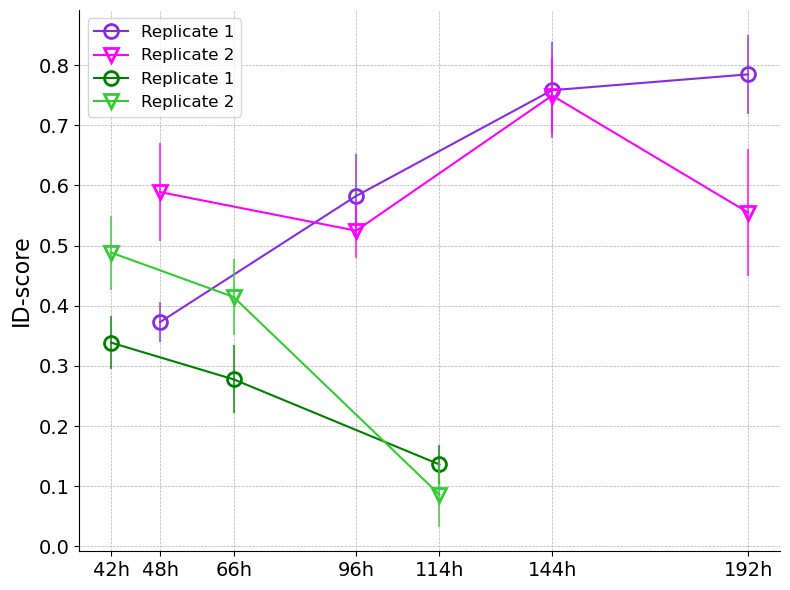

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

#extract data to plot
xr0 = list(id_rep_0.columns)
yr0 = np.mean(id_rep_0, axis = 0)
sr0 = np.std(id_rep_0, axis = 0)

xr1 = list(id_rep_1.columns)
yr1 = np.mean(id_rep_1, axis = 0)
sr1 = np.std(id_rep_1, axis = 0)

xd0 = list(id_diff_0.columns)
yd0 = np.mean(id_diff_0, axis = 0)
sd0 = np.std(id_diff_0, axis = 0)

xd1 = list(id_diff_1.columns)
yd1 = np.mean(id_diff_1, axis = 0)
sd1 =  np.std(id_diff_1, axis = 0)

ax.plot([float(x) for x in xr0], yr0, marker='o', markersize=10, markerfacecolor='none', markeredgewidth=2, color = 'blueviolet', label='Replicate 1')
ax.errorbar([float(x) for x in xr0], yr0, yerr=sr0,fmt=' ', alpha=0.7, color='blueviolet')
ax.plot([float(x) for x in xr1], yr1,marker='v', markersize=10, markerfacecolor='none', markeredgewidth=2, color='magenta', label='Replicate 2')
ax.errorbar([float(x) for x in xr1], yr1, yerr=sr1, fmt=' ', alpha=0.7, color='magenta')
ax.plot([1.5, 2.75, 4.85], yd0, marker='o', markersize=10, markerfacecolor='none', markeredgewidth=2, color = 'green', label='Replicate 1')
ax.errorbar([1.5, 2.75, 4.85], yd0, yerr=sd0,fmt=' ', alpha=0.7, color='green')
ax.plot([1.5, 2.75, 4.85], yd1,marker='v', markersize=10, markerfacecolor='none', markeredgewidth=2, color='limegreen',label='Replicate 2')
ax.errorbar([1.5, 2.75, 4.85], yd1, yerr=sd1, fmt=' ', alpha=0.7, color='limegreen')

plt.xticks([1.50, 2, 2.75, 4, 4.85, 6, 8], labels = ['42h','48h', '66h','96h','114h', '144h', '192h'])
ax.set_ylabel('ID-score', fontsize = 16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=14)
sns.despine()
ax.legend(fontsize=12, loc='upper left')

# Show plot
plt.tight_layout()
plt.show()